# 1. Analyzing The Dataset

In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
#reading the dataset
df=pd.read_csv("zomato.csv")
df.head() # prints the first N rows of a DataFrame

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [5]:
df['reviews_list']

0        [('Rated 4.0', 'RATED\n  A beautiful place to ...
1        [('Rated 4.0', 'RATED\n  Had been here for din...
2        [('Rated 3.0', "RATED\n  Ambience is not that ...
3        [('Rated 4.0', "RATED\n  Great food and proper...
4        [('Rated 4.0', 'RATED\n  Very good restaurant ...
                               ...                        
51712    [('Rated 5.0', "RATED\n  Food and service are ...
51713                                                   []
51714                                                   []
51715    [('Rated 4.0', 'RATED\n  Nice and friendly pla...
51716    [('Rated 5.0', 'RATED\n  Great ambience , look...
Name: reviews_list, Length: 51717, dtype: object

In [6]:
df['name'].nunique()

8792

# 2. Data Preprocessing And Cleaning

In [7]:
#Deleting Unnnecessary Columns
df=df.drop(['url','dish_liked','phone','address','menu_item','location'],axis=1) 

In [8]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [9]:
#Remove the NaN values from the dataset
df.isnull().sum()
df.dropna(how='any',inplace=True)
df.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 43480 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         43480 non-null  object
 1   online_order                 43480 non-null  object
 2   book_table                   43480 non-null  object
 3   rate                         43480 non-null  object
 4   votes                        43480 non-null  int64 
 5   rest_type                    43480 non-null  object
 6   cuisines                     43480 non-null  object
 7   approx_cost(for two people)  43480 non-null  object
 8   reviews_list                 43480 non-null  object
 9   listed_in(type)              43480 non-null  object
 10  listed_in(city)              43480 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.0+ MB


In [10]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [11]:
df=df.rename(columns={"name":'Name','rate':'Ratings','votes':'Votes','rest_type':'Restaurant_Type','cuisines':'Cuisines',
                      'approx_cost(for two people)':'Cost','listed_in(type)':'Type','listed_in(city)':'City',
                      'online_order':'Online Orders','book_table':'Booking Table','reviews_list' : 'Review'})

In [12]:
df['Cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [13]:
#Some Transformations
df['Cost'] = df['Cost'].astype(str) #Changing the Cost to string
df['Cost'] = df['Cost'].apply(lambda x: x.replace(',','')) #Using lambda function to replace ',' from Cost
df['Cost'] = df['Cost'].astype(float) # Changing the Cost to Float
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43480 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             43480 non-null  object 
 1   Online Orders    43480 non-null  object 
 2   Booking Table    43480 non-null  object 
 3   Ratings          43480 non-null  object 
 4   Votes            43480 non-null  int64  
 5   Restaurant_Type  43480 non-null  object 
 6   Cuisines         43480 non-null  object 
 7   Cost             43480 non-null  float64
 8   Review           43480 non-null  object 
 9   Type             43480 non-null  object 
 10  City             43480 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.0+ MB


In [14]:
## function to remove commas and convert the values
## into numbers
def Cost(value):
    value = str(value)
    if "," in value:
        value = float(value.replace(",",""))
        return value
    else:
        return float(value)
df['Cost'] = df['Cost'].apply(Cost)
print(df['Cost'].head())

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: Cost, dtype: float64


In [15]:
df['Cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130., 1700., 1400., 1350., 2200., 2000., 1800., 1900.,
        180.,  330., 2500., 2100., 3000., 2800., 3400.,   50.,   40.,
       1250., 3500., 4000., 2400., 2600., 1450.,   70., 3200.,  560.,
        240.,  360., 6000., 1050., 2300., 4100.,  120., 5000., 3700.,
       1650., 2700., 4500.])

In [16]:
#Removing '/5' from Rates
df = df.loc[df.Ratings !='NEW']
df = df.loc[df.Ratings !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == str else x
df.Ratings = df.Ratings.apply(remove_slash).str.strip().astype('float')
df['Ratings'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: Ratings, dtype: float64

In [17]:
# Adjust the column names
df.name = df.Name.apply(lambda x:x.title())
df['Online Orders'].replace(('Yes','No'),(1, 0),inplace=True)
df['Booking Table'].replace(('Yes','No'),(1, 0),inplace=True)
df.Cost.unique()

C:\Users\varig\AppData\Local\Temp\ipykernel_17060\2298352069.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.name = df.Name.apply(lambda x:x.title())


array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199., 1100., 1600.,  230.,  130.,
       1700., 1350., 2200., 1400., 2000., 1800., 1900.,  180.,  330.,
       2500., 2100., 3000., 2800., 3400.,   50.,   40., 1250., 3500.,
       4000., 2400., 2600., 1450.,   70., 3200.,  240., 6000., 1050.,
       2300., 4100.,  120., 5000., 3700., 1650., 2700., 4500.,   80.])

In [18]:
df['Online Orders'] = df['Online Orders'].astype(int)
df['Booking Table'] = df['Booking Table'].astype(int)

In [19]:
restaurants = list(df['Name'].unique())
df['Mean Rating'] = 0

for i in range(len(restaurants)):
    df['Mean Rating'][df['Name'] == restaurants[i]] = df['Ratings'][df['Name'] == restaurants[i]].mean()

C:\Users\varig\AppData\Local\Temp\ipykernel_17060\329228036.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mean Rating'][df['Name'] == restaurants[i]] = df['Ratings'][df['Name'] == restaurants[i]].mean()
C:\Users\varig\AppData\Local\Temp\ipykernel_17060\329228036.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4.118181818181818' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['Mean Rating'][df['Name'] == restaurants[i]] = df['Ratings'][df['Name'] == restaurants[i]].mean()


## NLP Review text preprocessing

In [20]:
mini_project = df.copy()

In [21]:
# 5 examples of these columns before text processing:
mini_project[['Review', 'Cuisines']].sample(5)

,Review,Cuisines
16901,"[('Rated 4.0', ""RATED\n Dropped by here with ...","Continental, Italian, Beverages"
34188,"[('Rated 3.0', 'RATED\n Had been to this hote...","Chinese, North Indian, Cafe"
28008,"[('Rated 4.0', 'RATED\n Small cafe with decen...","Chinese, Singaporean, Thai, Asian, Nepalese, M..."
1609,"[('Rated 1.0', 'RATED\n Wrong order delivered...","North Indian, Chinese, Thai"
13407,"[('Rated 2.0', ""RATED\n We went there around ...","Mediterranean, Continental, North Indian, Mugh..."


In [22]:
## Lower Casing
mini_project["Review"] = mini_project["Review"].str.lower()
mini_project[['Review', 'Cuisines']].sample(5)

,Review,Cuisines
5697,"[('rated 4.0', ""rated\n cake is love?it's tas...",Bakery
17995,"[('rated 2.0', ""rated\n it's average food for...","North Indian, Chinese"
28049,"[('rated 3.0', ""rated\n brain freezers - wafe...","Ice Cream, Desserts"
14307,"[('rated 1.0', 'rated\n ridiculous job! look ...","Bakery, Desserts"
8634,"[('rated 5.0', 'rated\n loved the thai flavou...","Chinese, Thai, Asian, Malaysian, Vietnamese, S..."


In [23]:
def extract_ratings(text):
    # Use regular expression to find numbers with a decimal point
    ratings = re.findall(r'(\d+\.\d+)', text)
    
    if ratings:
        return float(ratings[0])  # Convert the extracted rating to a float
    else:
        return None  # Return None if no rating is found

# Apply the function to the 'text' column and store results in a new column 'ratings'
mini_project['User_Ratings'] = mini_project['Review'].apply(extract_ratings)

In [24]:
print(mini_project.isnull().sum())

Name                  0
Online Orders         0
Booking Table         0
Ratings               0
Votes                 0
Restaurant_Type       0
Cuisines              0
Cost                  0
Review                0
Type                  0
City                  0
Mean Rating           0
User_Ratings       1110
dtype: int64


In [25]:
#Remove the NaN values from the dataset
mini_project.isnull().sum()
mini_project.dropna(how='any',inplace=True)
mini_project.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 40111 entries, 0 to 41220
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             40111 non-null  object 
 1   Online Orders    40111 non-null  int32  
 2   Booking Table    40111 non-null  int32  
 3   Ratings          40111 non-null  float64
 4   Votes            40111 non-null  int64  
 5   Restaurant_Type  40111 non-null  object 
 6   Cuisines         40111 non-null  object 
 7   Cost             40111 non-null  float64
 8   Review           40111 non-null  object 
 9   Type             40111 non-null  object 
 10  City             40111 non-null  object 
 11  Mean Rating      40111 non-null  float64
 12  User_Ratings     40111 non-null  float64
dtypes: float64(4), int32(2), int64(1), object(6)
memory usage: 4.0+ MB


In [26]:
print(mini_project.isnull().sum())

Name               0
Online Orders      0
Booking Table      0
Ratings            0
Votes              0
Restaurant_Type    0
Cuisines           0
Cost               0
Review             0
Type               0
City               0
Mean Rating        0
User_Ratings       0
dtype: int64


In [27]:
mini_project.head()

,Name,Online Orders,Booking Table,Ratings,Votes,Restaurant_Type,Cuisines,Cost,Review,Type,City,Mean Rating,User_Ratings
0,Jalsa,1,1,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('rated 4.0', 'rated\n a beautiful place to ...",Buffet,Banashankari,4.118182,4.0
1,Spice Elephant,1,0,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('rated 4.0', 'rated\n had been here for din...",Buffet,Banashankari,4.100000,4.0
2,San Churro Cafe,1,0,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('rated 3.0', ""rated\n ambience is not that ...",Buffet,Banashankari,3.800000,3.0
3,Addhuri Udupi Bhojana,0,0,3.7,88,Quick Bites,"South Indian, North Indian",300.0,"[('rated 4.0', ""rated\n great food and proper...",Buffet,Banashankari,3.700000,4.0
4,Grand Village,0,0,3.8,166,Casual Dining,"North Indian, Rajasthani",600.0,"[('rated 4.0', 'rated\n very good restaurant ...",Buffet,Banashankari,3.800000,4.0


In [28]:
restaurant_names = mini_project['Name'].nunique()
restaurant_names

6359

In [29]:
mini_project = mini_project.drop(['Review'],axis=1)

# 3. Exploratory Data Analysis

In [30]:
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
mini_project.columns

Index(['Name', 'Online Orders', 'Booking Table', 'Ratings', 'Votes',
       'Restaurant_Type', 'Cuisines', 'Cost', 'Type', 'City', 'Mean Rating',
       'User_Ratings'],
      dtype='object')

### How many restaurants in Bangalore take online orders?

Online Orders
1    26647
0    13464
Name: count, dtype: int64


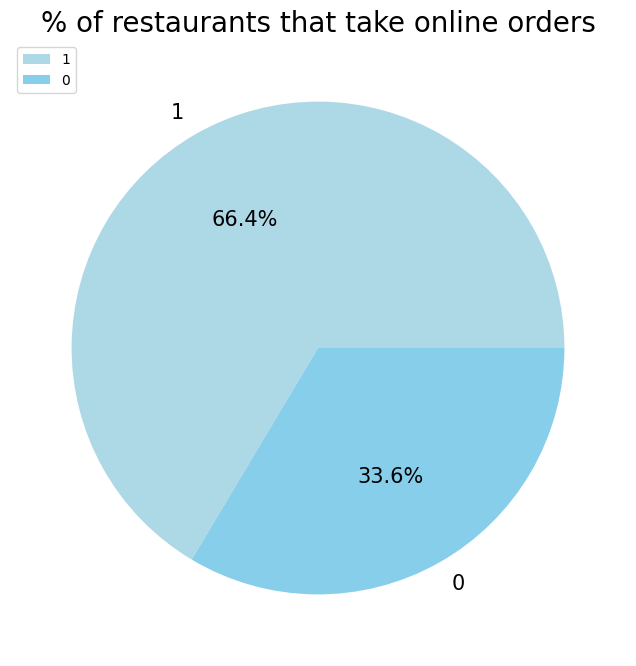

In [32]:
print(mini_project['Online Orders'].value_counts())
plt.figure(figsize=(20,8))
mini_project['Online Orders'].value_counts().plot(kind='pie',colors=['lightblue','skyblue'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that take online orders',size=20)
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 10})
plt.gca().set_facecolor('black')

### What percentage of restaurants offer table booking facilities?

Booking Table
0    33888
1     6223
Name: count, dtype: int64


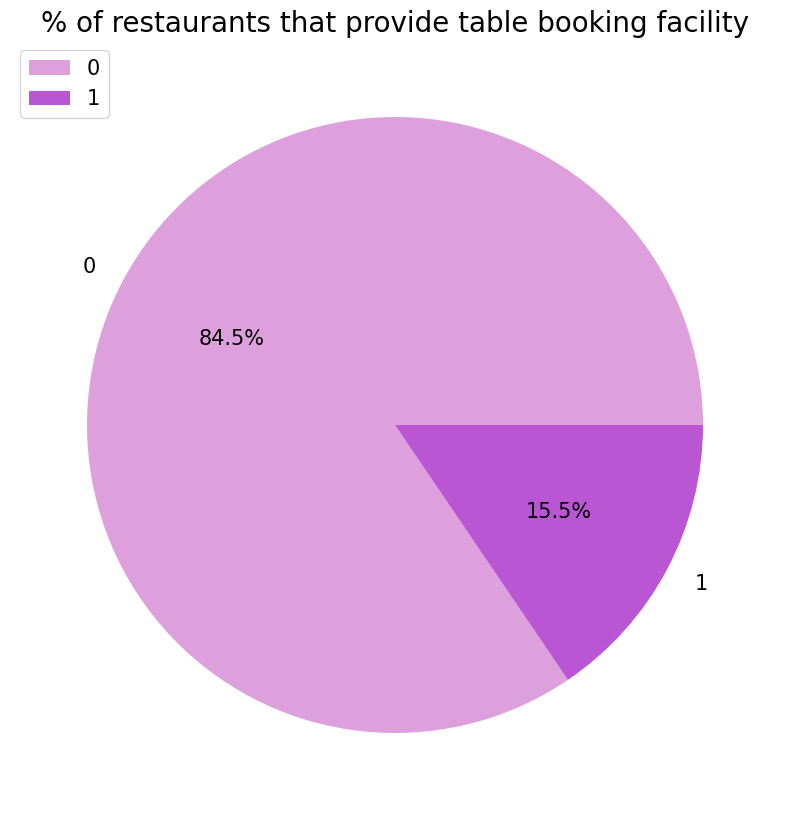

In [33]:
print(mini_project['Booking Table'].value_counts())
plt.figure(figsize=(20,10))
mini_project['Booking Table'].value_counts().plot(kind='pie',colors=['plum','mediumorchid'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that provide table booking facility',size=20)
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 15})

### What was the most common rating?

Text(0, 0.5, 'Ratings Count')

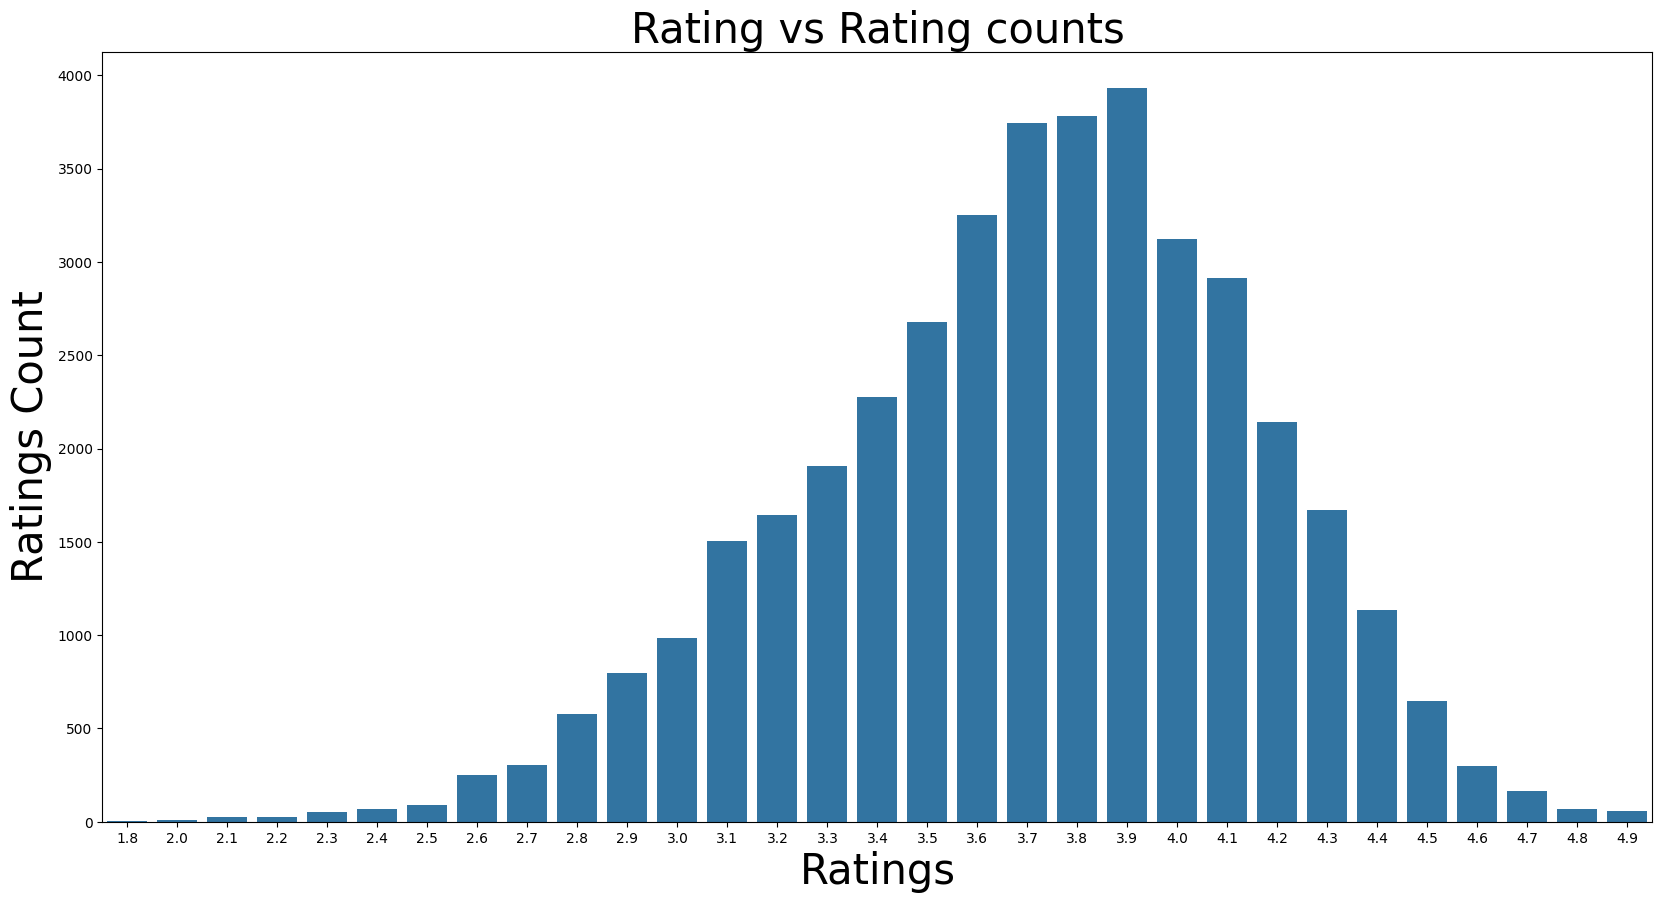

In [34]:
ratings=mini_project.groupby(['Ratings']).size().reset_index().rename(columns={0:"Rating_Count"})
plt.figure(figsize=(20,10))
sns.barplot(x='Ratings',y='Rating_Count',data=ratings)
plt.title('Rating vs Rating counts',size=30)
plt.xlabel('Ratings',size=30)
plt.ylabel('Ratings Count',size=30)

### Is there any correlation between the two people’s approximated Cost and The restaurant’s ratings?

C:\Users\varig\AppData\Local\Temp\ipykernel_17060\3174638008.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, -1000.0, '-1,000'),
 Text(0, 0.0, '0'),
 Text(0, 1000.0, '1,000'),
 Text(0, 2000.0, '2,000'),
 Text(0, 3000.0, '3,000'),
 Text(0, 4000.0, '4,000'),
 Text(0, 5000.0, '5,000'),
 Text(0, 6000.0, '6,000'),
 Text(0, 7000.0, '7,000')]

<Figure size 2000x1000 with 0 Axes>

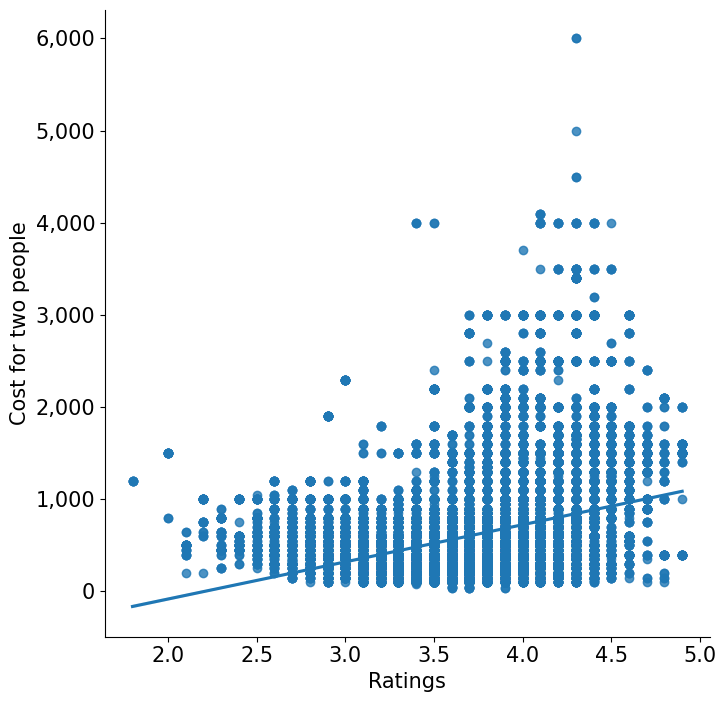

In [35]:
plt.figure(figsize=(20,10))
sns.lmplot(x='Ratings',y='Cost',data=mini_project,height=7)
plt.xlabel('Ratings',size=15)
plt.ylabel('Cost for two people',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

numeric_columns = mini_project.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns, cmap="YlGnBu", annot=True, cbar=False)
plt.show()

# 4. Feature Encoding

In [36]:
df1 = mini_project.copy()
df2 = mini_project.copy()

In [37]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df2['Name']=encoder.fit_transform(df2['Name'])
df2['Cuisines']=encoder.fit_transform(df2['Cuisines'])
df2['Type']=encoder.fit_transform(df2['Type'])
df2['Restaurant_Type']=encoder.fit_transform(df2['Restaurant_Type'])
df2['City']=encoder.fit_transform(df2['City'])

In [38]:
encoder= LabelEncoder()
df1['Name']=encoder.fit_transform(df1['Name'])
df1['Cuisines']=encoder.fit_transform(df1['Cuisines'])
df1['Type']=encoder.fit_transform(df1['Type'])
df1['Restaurant_Type']=encoder.fit_transform(df1['Restaurant_Type'])
df1['City']=encoder.fit_transform(df1['City'])
df1['Booking Table']=encoder.fit_transform(df1['Booking Table'])
df1['Online Orders']=encoder.fit_transform(df1['Online Orders'])

'''to solve multi encoding problem so 3 is not given more weightage than..say 1 or delhi
so just change them to columns from rows
one hot encoding is what this is called
then remove multi-collinearity using get dummies'''

df1 = pd.get_dummies(df1, columns=['City','User_Ratings'], drop_first=True,dtype=int)
df1.head()

,Name,Online Orders,Booking Table,Ratings,Votes,Restaurant_Type,Cuisines,Cost,Type,Mean Rating,...,City_28,City_29,User_Ratings_1.5,User_Ratings_2.0,User_Ratings_2.5,User_Ratings_3.0,User_Ratings_3.5,User_Ratings_4.0,User_Ratings_4.5,User_Ratings_5.0
0,2670,1,1,4.1,775,23,1871,800.0,0,4.118182,...,0,0,0,0,0,0,0,1,0,0
1,5069,1,0,4.1,787,23,807,800.0,0,4.100000,...,0,0,0,0,0,0,0,1,0,0
2,4688,1,0,3.8,918,18,647,800.0,0,3.800000,...,0,0,0,0,0,1,0,0,0,0
3,134,0,0,3.7,88,72,2187,300.0,0,3.700000,...,0,0,0,0,0,0,0,1,0,0
4,2162,0,0,3.8,166,23,1898,600.0,0,3.800000,...,0,0,0,0,0,0,0,1,0,0


In [39]:
df2.head()

,Name,Online Orders,Booking Table,Ratings,Votes,Restaurant_Type,Cuisines,Cost,Type,City,Mean Rating,User_Ratings
0,2670,1,1,4.1,775,23,1871,800.0,0,1,4.118182,4.0
1,5069,1,0,4.1,787,23,807,800.0,0,1,4.100000,4.0
2,4688,1,0,3.8,918,18,647,800.0,0,1,3.800000,3.0
3,134,0,0,3.7,88,72,2187,300.0,0,1,3.700000,4.0
4,2162,0,0,3.8,166,23,1898,600.0,0,1,3.800000,4.0


In [40]:
df1.corr()

,Name,Online Orders,Booking Table,Ratings,Votes,Restaurant_Type,Cuisines,Cost,Type,Mean Rating,...,City_28,City_29,User_Ratings_1.5,User_Ratings_2.0,User_Ratings_2.5,User_Ratings_3.0,User_Ratings_3.5,User_Ratings_4.0,User_Ratings_4.5,User_Ratings_5.0
Name,1.000000,0.007799,0.013295,0.010379,0.005168,0.008419,0.089822,0.036871,0.015610,0.011499,...,0.002054,0.006210,0.016130,0.021930,-0.000986,-0.018854,0.000658,-0.006448,0.005530,0.014265
Online Orders,0.007799,1.000000,-0.060537,0.057500,-0.019012,0.038465,-0.019042,-0.183683,-0.237433,0.050076,...,0.013144,-0.014962,-0.042031,0.021985,-0.063323,0.019269,-0.101740,0.014585,-0.094799,-0.025424
Booking Table,0.013295,-0.060537,1.000000,0.422969,0.392582,-0.241508,-0.013749,0.614730,0.115398,0.438232,...,-0.011866,0.002091,-0.014156,-0.023514,-0.023669,0.015515,-0.030487,0.088310,-0.021358,0.007435
Ratings,0.010379,0.057500,0.422969,1.000000,0.432668,-0.219210,-0.090811,0.381688,0.036873,0.946535,...,-0.037442,-0.031205,-0.033067,-0.128424,-0.055292,-0.054085,-0.062638,0.235219,-0.031880,0.126914
Votes,0.005168,-0.019012,0.392582,0.432668,1.000000,-0.142504,-0.048433,0.367403,0.072048,0.435342,...,-0.008035,-0.014589,-0.013649,-0.012172,-0.019725,-0.004073,-0.033165,0.078016,-0.025547,0.014524
Restaurant_Type,0.008419,0.038465,-0.241508,-0.219210,-0.142504,1.000000,0.282702,-0.334340,0.034723,-0.229027,...,0.005406,0.018695,0.005648,0.008042,0.004888,-0.012787,0.034991,-0.072526,0.000490,0.005741
Cuisines,0.089822,-0.019042,-0.013749,-0.090811,-0.048433,0.282702,1.000000,-0.060127,0.058192,-0.096213,...,0.002672,-0.009571,0.019690,0.027094,0.004326,0.010015,0.009834,-0.029758,-0.008478,-0.009493
Cost,0.036871,-0.183683,0.614730,0.381688,0.367403,-0.334340,-0.060127,1.000000,0.185913,0.401910,...,-0.008402,0.016312,0.003415,-0.010765,-0.012119,0.020511,-0.033999,0.083261,-0.033823,0.002103
Type,0.015610,-0.237433,0.115398,0.036873,0.072048,0.034723,0.058192,0.185913,1.000000,0.042999,...,-0.000696,0.030339,0.010029,-0.002747,0.006229,0.015693,0.027560,0.018046,0.002323,-0.011980
Mean Rating,0.011499,0.050076,0.438232,0.946535,0.435342,-0.229027,-0.096213,0.401910,0.042999,1.000000,...,-0.028326,-0.023206,-0.033063,-0.117289,-0.056409,-0.041173,-0.063965,0.222191,-0.033579,0.116411


In [41]:
df1.corr()['Ratings']

Name                0.010379
Online Orders       0.057500
Booking Table       0.422969
Ratings             1.000000
Votes               0.432668
Restaurant_Type    -0.219210
Cuisines           -0.090811
Cost                0.381688
Type                0.036873
Mean Rating         0.946535
City_1             -0.008439
City_2             -0.057880
City_3              0.003123
City_4             -0.026928
City_5              0.042910
City_6             -0.054606
City_7              0.045170
City_8             -0.065810
City_9              0.003900
City_10            -0.015641
City_11             0.019435
City_12            -0.032792
City_13            -0.003857
City_14            -0.018619
City_15            -0.022460
City_16             0.033547
City_17             0.033173
City_18             0.032004
City_19             0.033453
City_20             0.032409
City_21             0.042325
City_22             0.007905
City_23            -0.060757
City_24            -0.017970
City_25       

In [42]:
correlation_matrix = df1.corr(method='kendall')

In [43]:
correlation_matrix_1 = df2.corr(method='kendall')

Index(['Name', 'Online Orders', 'Booking Table', 'Ratings', 'Votes',
       'Restaurant_Type', 'Cuisines', 'Cost', 'Type', 'Mean Rating', 'City_1',
       'City_2', 'City_3', 'City_4', 'City_5', 'City_6', 'City_7', 'City_8',
       'City_9', 'City_10', 'City_11', 'City_12', 'City_13', 'City_14',
       'City_15', 'City_16', 'City_17', 'City_18', 'City_19', 'City_20',
       'City_21', 'City_22', 'City_23', 'City_24', 'City_25', 'City_26',
       'City_27', 'City_28', 'City_29', 'User_Ratings_1.5', 'User_Ratings_2.0',
       'User_Ratings_2.5', 'User_Ratings_3.0', 'User_Ratings_3.5',
       'User_Ratings_4.0', 'User_Ratings_4.5', 'User_Ratings_5.0'],
      dtype='object')

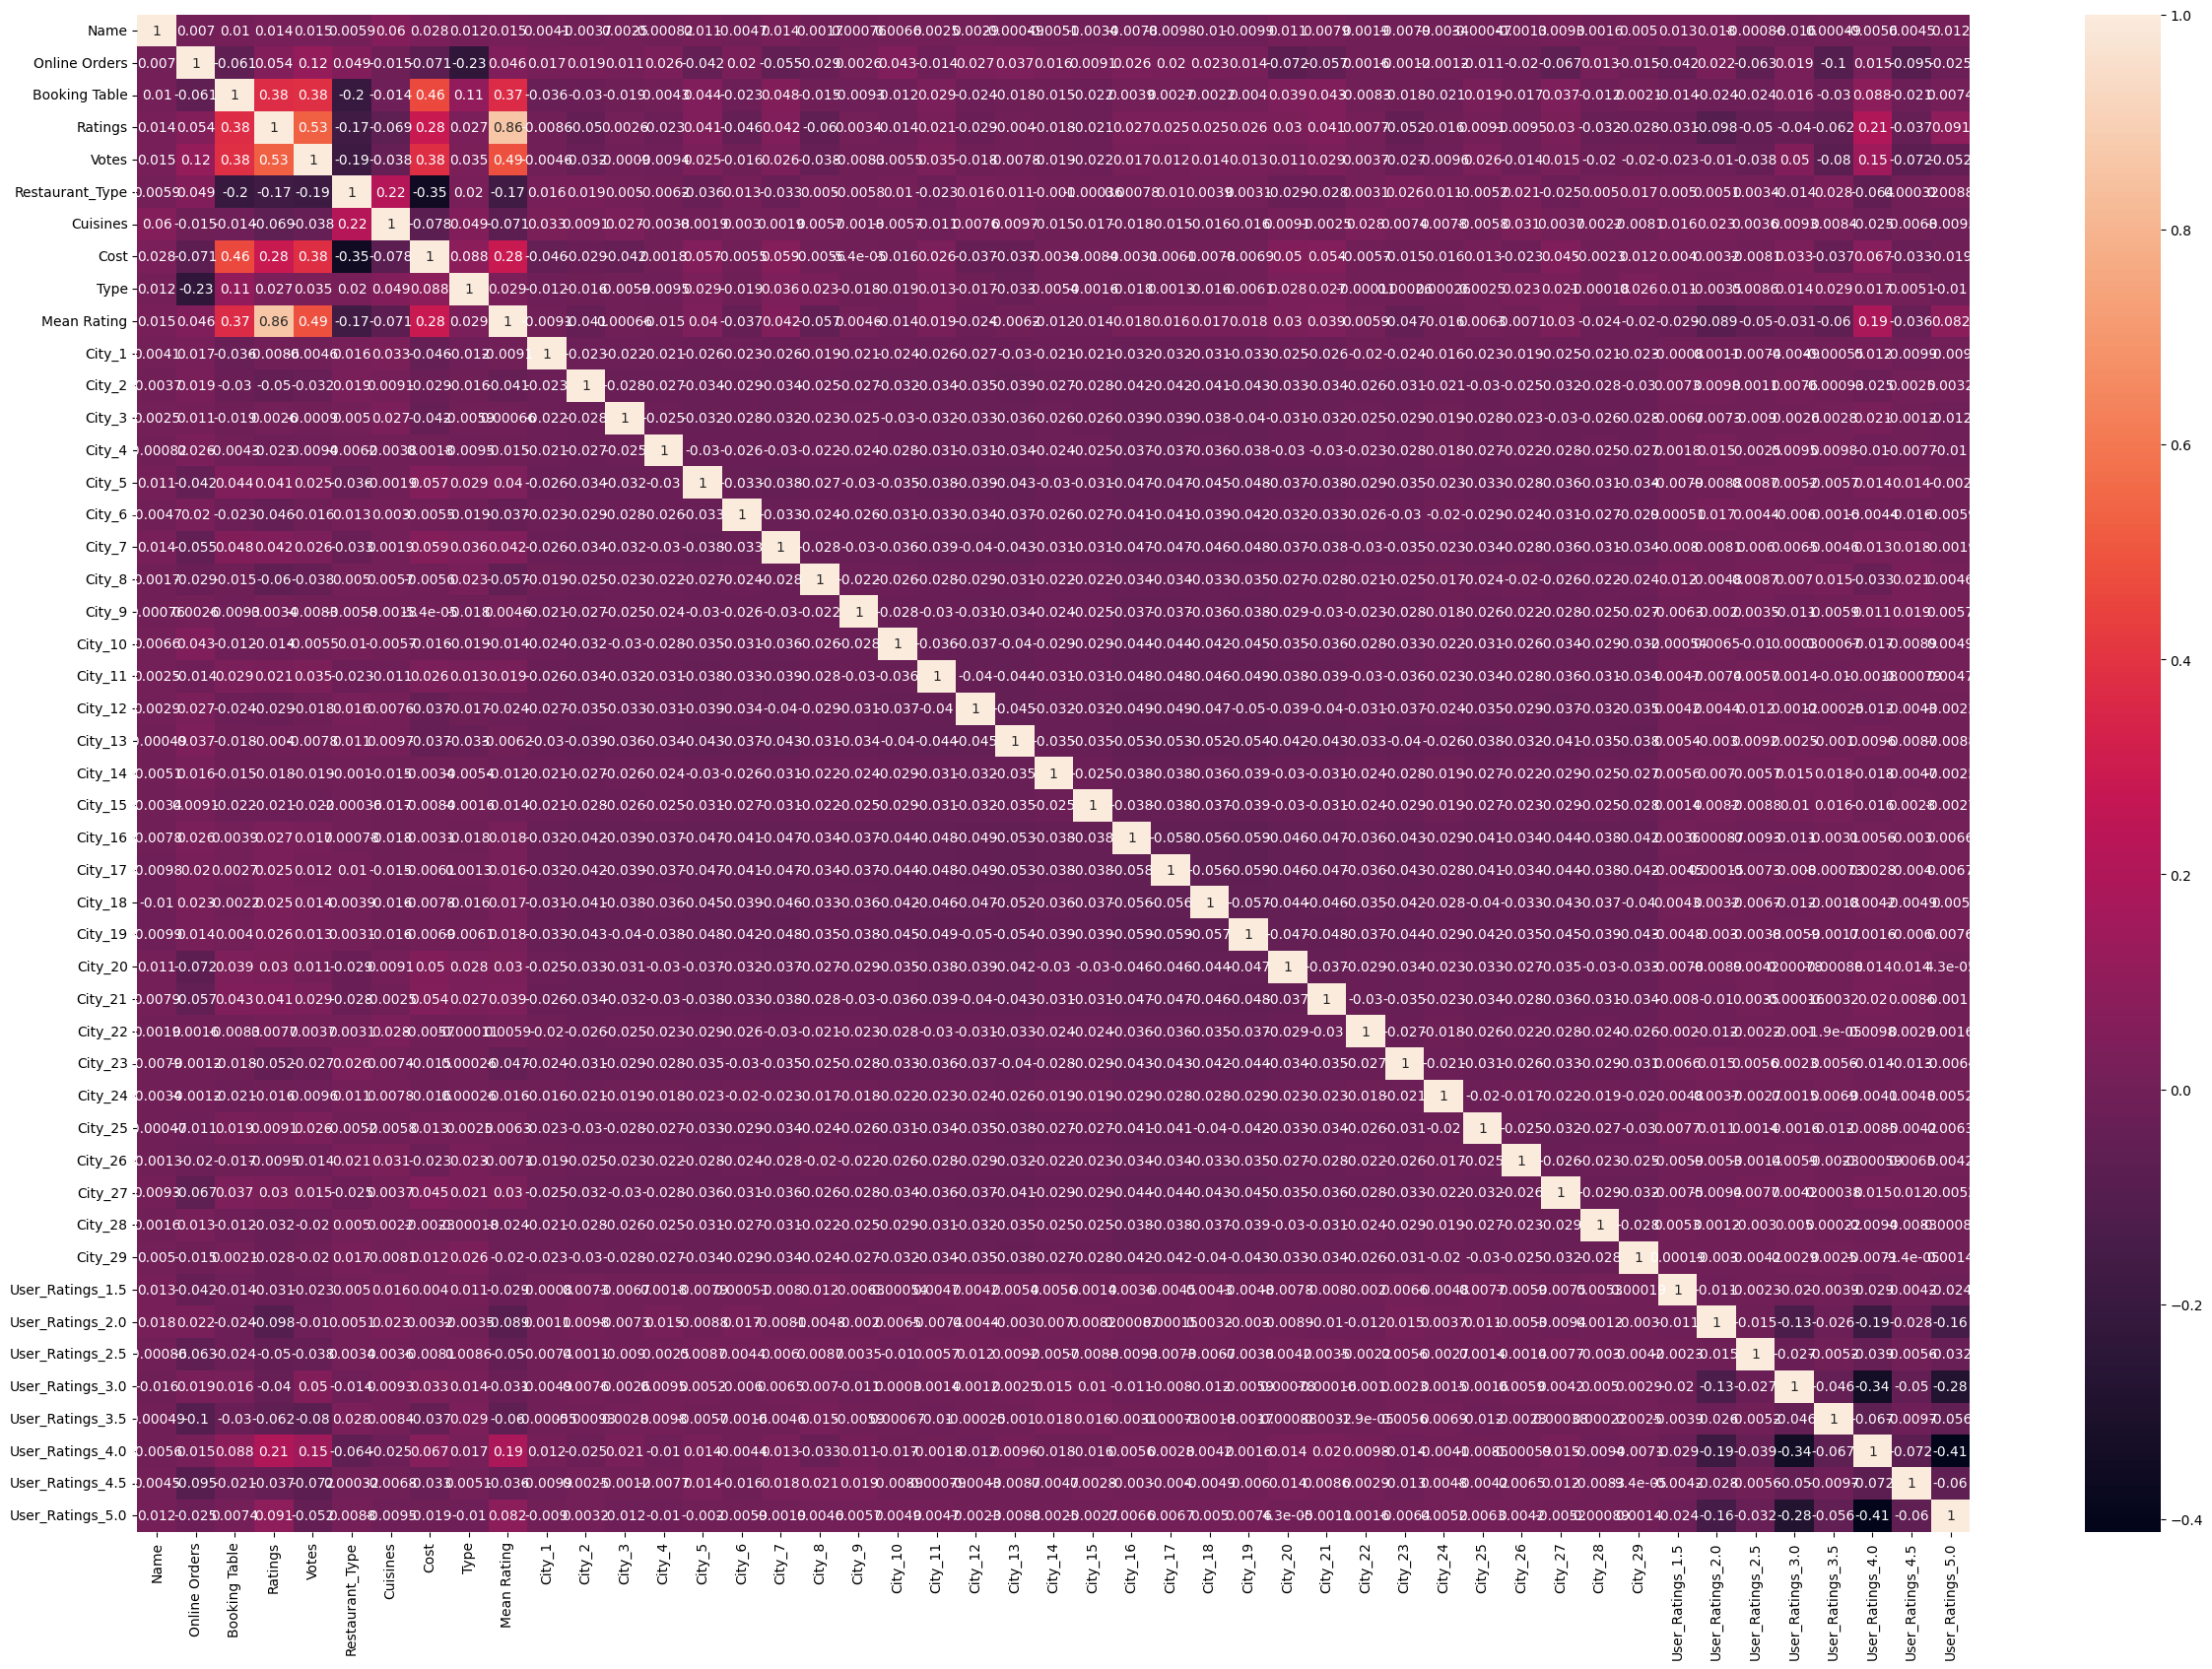

In [44]:
plt.figure(figsize=(30,20))
sns.heatmap(correlation_matrix, annot=True)
df1.columns

Index(['Name', 'Online Orders', 'Booking Table', 'Ratings', 'Votes',
       'Restaurant_Type', 'Cuisines', 'Cost', 'Type', 'City', 'Mean Rating',
       'User_Ratings'],
      dtype='object')

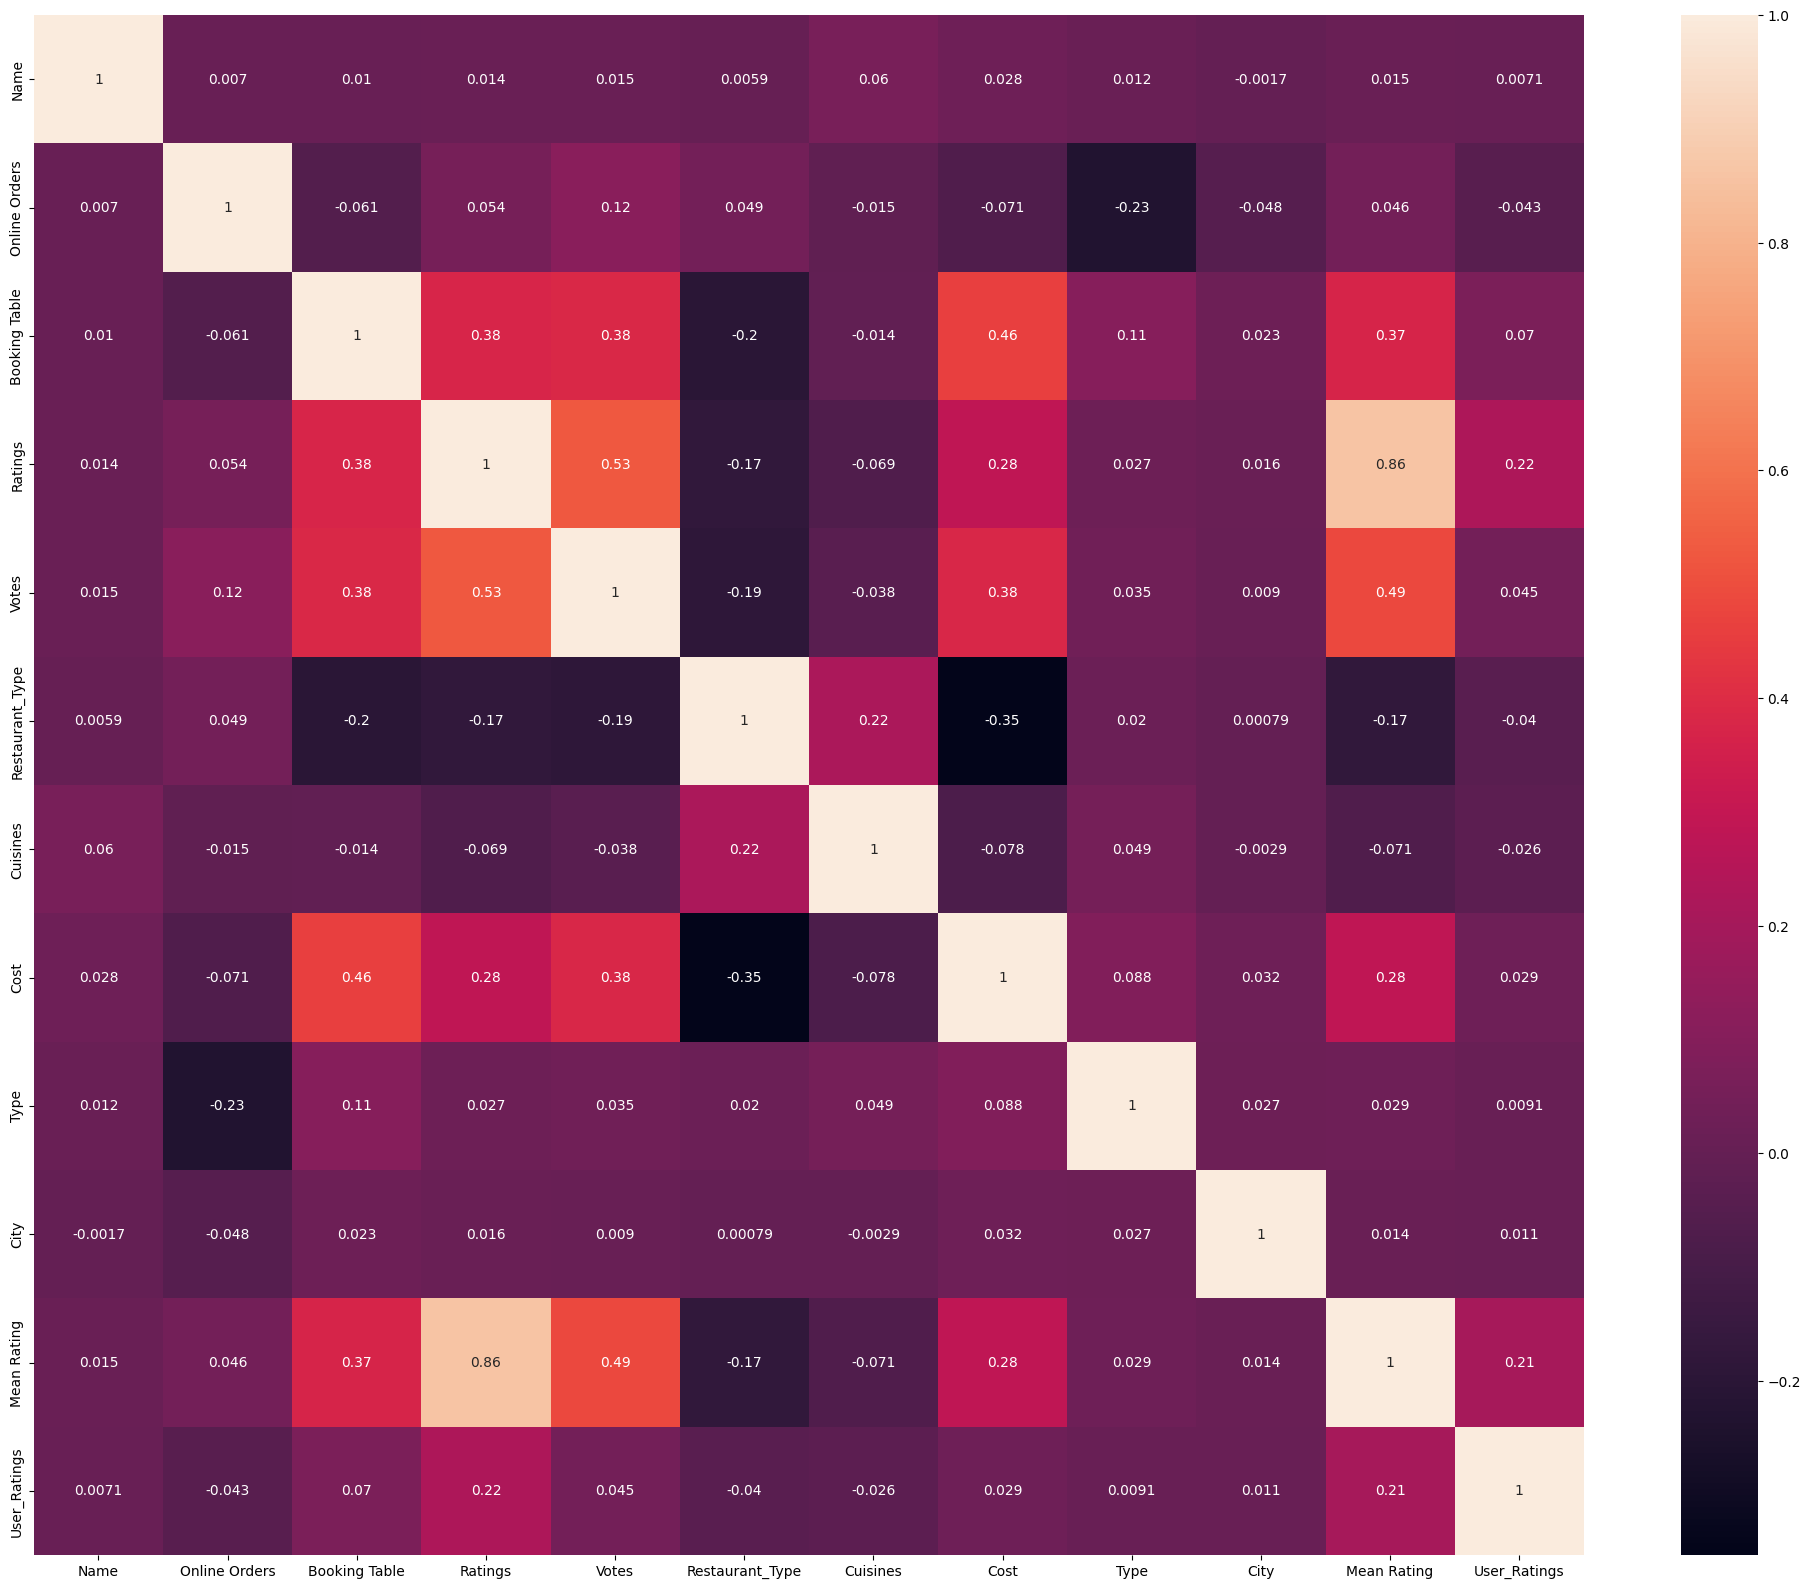

In [45]:
plt.figure(figsize=(25,20))
sns.heatmap(correlation_matrix_1, annot=True)
df2.columns

# 5. Train Test Splitting

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40111 entries, 0 to 41220
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             40111 non-null  int32  
 1   Online Orders    40111 non-null  int32  
 2   Booking Table    40111 non-null  int32  
 3   Ratings          40111 non-null  float64
 4   Votes            40111 non-null  int64  
 5   Restaurant_Type  40111 non-null  int32  
 6   Cuisines         40111 non-null  int32  
 7   Cost             40111 non-null  float64
 8   Type             40111 non-null  int32  
 9   City             40111 non-null  int32  
 10  Mean Rating      40111 non-null  float64
 11  User_Ratings     40111 non-null  float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 2.9 MB


In [48]:
df2[['Cost','User_Ratings','Votes']] = df2[['Cost','User_Ratings','Votes']].astype(int)

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40111 entries, 0 to 41220
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             40111 non-null  int32  
 1   Online Orders    40111 non-null  int32  
 2   Booking Table    40111 non-null  int32  
 3   Ratings          40111 non-null  float64
 4   Votes            40111 non-null  int32  
 5   Restaurant_Type  40111 non-null  int32  
 6   Cuisines         40111 non-null  int32  
 7   Cost             40111 non-null  int32  
 8   Type             40111 non-null  int32  
 9   City             40111 non-null  int32  
 10  Mean Rating      40111 non-null  float64
 11  User_Ratings     40111 non-null  int32  
dtypes: float64(2), int32(10)
memory usage: 2.4 MB


In [50]:
X=df2.drop(columns=['User_Ratings']).values
Y=df2[['User_Ratings']].values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=32)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(28077, 11)
(12034, 11)
(28077, 1)
(12034, 1)


# 6. Model Selection

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

import time
import pickle
from collections import Counter


In [52]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_train shape: ", Y_train.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (28077, 11)
X_test shape:  (12034, 11)
Y_train shape:  (28077, 1)
Y_test shape:  (12034, 1)


# KNN

In [53]:
def knn_alg(X_train, X_test, Y_train, Y_test):
    knn = {}

    # K-Nearest Neighbors
    knn_model = KNeighborsClassifier(n_neighbors=3)
    knn_classifier = MultiOutputClassifier(knn_model, n_jobs=-1)
    knn_classifier.fit(X_train, Y_train)
    knn_pred = knn_classifier.predict(X_test)
    knn_accuracy = np.mean([accuracy_score(Y_test[:, i], knn_pred[:, i]) for i in range(Y_test.shape[1])])
    knn_f1 = np.mean([f1_score(Y_test[:, i], knn_pred[:, i],average='macro') for i in range(Y_test.shape[1])])
    knn['KNN'] = {'model': knn_classifier, 'accuracy': f'{knn_accuracy* 100:.4f}', 'f1 score' : f'{knn_f1* 100:.4f}'}

    return knn

In [54]:
from sklearn.model_selection import GridSearchCV

def knn_alg(X_train, X_test, Y_train, Y_test):
    knn = {}

    param_grid = {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, Y_train)
    knn_model = grid_search.best_estimator_
    # K-Nearest Neighbors
    #knn_model = KNeighborsClassifier(n_neighbors=3)
    knn_classifier = MultiOutputClassifier(knn_model, n_jobs=-1)
    knn_classifier.fit(X_train, Y_train)
    knn_pred = knn_classifier.predict(X_test)
    knn_accuracy = np.mean([accuracy_score(Y_test[:, i], knn_pred[:, i]) for i in range(Y_test.shape[1])])
    knn_f1 = np.mean([f1_score(Y_test[:, i], knn_pred[:, i],average='macro') for i in range(Y_test.shape[1])])
    knn['KNN'] = {'model': knn_classifier, 'accuracy': f'{knn_accuracy* 100:.4f}', 'f1 score' : f'{knn_f1* 100:.4f}'}

    return knn

In [55]:
from sklearn.model_selection import GridSearchCV

def knn_alg(X_train, X_test, Y_train, Y_test):
    knn = {}

    param_grid = {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, Y_train)
    knn_model = grid_search.best_estimator_
    # K-Nearest Neighbors
    #knn_model = KNeighborsClassifier(n_neighbors=3)
    knn_model.fit(X_train, Y_train)
    knn_pred = knn_model.predict(X_test)
    knn_accuracy = accuracy_score(Y_test, knn_pred)
    knn_f1 = f1_score(Y_test, knn_pred, average='macro')
    knn['KNN'] = {'model': knn_model, 'accuracy': f'{knn_accuracy* 100:.4f}', 'f1 score' : f'{knn_f1* 100:.4f}'}

    return knn

In [56]:
# Example usage:
knn = knn_alg(X_train, X_test, Y_train, Y_test)

C:\Users\varig\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\varig\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\varig\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\varig\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:233: 

In [57]:
knn

{'KNN': {'model': KNeighborsClassifier(n_neighbors=3, p=1, weights='distance'),
  'accuracy': '87.9176',
  'f1 score': '87.2758'}}

# Naive Bayes

In [58]:
def nb_alg(X_train, X_test, Y_train, Y_test):
    nb = {}

    # Naive Bayes
    nb_model = GaussianNB()
    nb_classifier = MultiOutputClassifier(nb_model, n_jobs=-1)
    nb_classifier.fit(X_train, Y_train)
    nb_pred = nb_classifier.predict(X_test)
    nb_accuracy = np.mean([accuracy_score(Y_test[:, i], nb_pred[:, i]) for i in range(Y_test.shape[1])])
    nb_f1 = np.mean([f1_score(Y_test[:, i], nb_pred[:, i],average='weighted') for i in range(Y_test.shape[1])])
    nb['NaiveBayes'] = {'model': nb_classifier, 'accuracy': f'{nb_accuracy* 100:.4f}', 'f1 score' : f'{nb_f1* 100:.4f}'}

    return nb

In [59]:
from sklearn.ensemble import BaggingClassifier

def nb_alg(X_train, X_test, Y_train, Y_test):
    nb = {}
    
    # Naive Bayes
    param_grid = {}
    grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, Y_train)
    nb_model = grid_search.best_estimator_
    nb_classifier = MultiOutputClassifier(nb_model, n_jobs=-1)
    nb_classifier.fit(X_train, Y_train)
    nb_pred = nb_classifier.predict(X_test)
    nb_accuracy = np.mean([accuracy_score(Y_test[:, i], nb_pred[:, i]) for i in range(Y_test.shape[1])])
    nb_f1 = np.mean([f1_score(Y_test[:, i], nb_pred[:, i],average='weighted') for i in range(Y_test.shape[1])])
    nb['NaiveBayes'] = {'model': nb_classifier, 'accuracy': f'{nb_accuracy* 100:.4f}', 'f1 score' : f'{nb_f1* 100:.4f}'}

    return nb

In [60]:
def nb_alg(X_train, X_test, Y_train, Y_test):
    nb = {}

    # Naive Bayes
    param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
    grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, Y_train)
    nb_model = grid_search.best_estimator_
    nb_model.fit(X_train, Y_train)
    nb_pred = nb_model.predict(X_test)
    nb_accuracy = accuracy_score(Y_test, nb_pred)
    nb_f1 = f1_score(Y_test, nb_pred,average='weighted')
    nb['NaiveBayes'] = {'model': nb_model, 'accuracy': f'{nb_accuracy* 100:.4f}', 'f1 score' : f'{nb_f1* 100:.4f}'}

    return nb

In [61]:
# Example usage:
nb = nb_alg(X_train, X_test, Y_train, Y_test)

C:\Users\varig\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\varig\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\varig\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\varig\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataC

In [62]:
nb

{'NaiveBayes': {'model': GaussianNB(var_smoothing=1e-08),
  'accuracy': '31.9927',
  'f1 score': '22.8226'}}

# Random Forest

In [63]:
def rf_alg(X_train, X_test, Y_train, Y_test):
    rf = {}

    # Random Forest
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, Y_train)
    rf_pred = rf_model.predict(X_test)
    rf_accuracy = np.mean([accuracy_score(Y_test[:, i], rf_pred[:, i]) for i in range(Y_test.shape[1])])
    rf_f1 = np.mean([f1_score(Y_test[:, i], rf_pred[:, i],average='macro') for i in range(Y_test.shape[1])])
    rf['RandomForest'] = {'model': rf_classifier, 'accuracy': f'{rf_accuracy* 100:.4f}', 'f1 score' : f'{rf_f1* 100:.4f}'}    

    return rf

In [64]:
def rf_alg(X_train, X_test, Y_train, Y_test):
    rf = {}

    # Random Forest
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, Y_train)
    rf_pred = rf_model.predict(X_test)
    rf_accuracy = accuracy_score(Y_test, rf_pred)
    rf_f1 = f1_score(Y_test, rf_pred,average='macro')
    rf['RandomForest'] = {'model': rf_model, 'accuracy': f'{rf_accuracy* 100:.4f}', 'f1 score' : f'{rf_f1* 100:.4f}'}    

    return rf

In [65]:
# Example usage:
rf = rf_alg(X_train, X_test, Y_train, Y_test)

C:\Users\varig\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [66]:
rf

{'RandomForest': {'model': RandomForestClassifier(),
  'accuracy': '87.9342',
  'f1 score': '87.5847'}}

# SVM

In [67]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
def svm_alg(X_train_scaled, X_test_scaled, Y_train, Y_test):
    svm = {}

    # Support Vector Machine (SVM)
    svm_model = SVC()
    svm_classifier = MultiOutputClassifier(svm_model, n_jobs=-1)
    svm_classifier.fit(X_train_scaled, Y_train)
    svm_pred = svm_classifier.predict(X_test_scaled)
    svm_accuracy = np.mean([accuracy_score(Y_test[:, i], svm_pred[:, i]) for i in range(Y_test.shape[1])])
    svm_f1 = np.mean([f1_score(Y_test[:, i], svm_pred[:, i],average='macro') for i in range(Y_test.shape[1])])
    svm['SVM'] = {'model': svm_classifier, 'accuracy': f'{svm_accuracy* 100:.4f}', 'f1 score' : f'{svm_f1* 100:.4f}'}    

    return svm

In [68]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
def svm_alg(X_train_scaled, X_test_scaled, Y_train, Y_test):
    svm = {}

    # Support Vector Machine (SVM)
    svm_model = SVC()
    svm_model.fit(X_train_scaled, Y_train)
    svm_pred = svm_model.predict(X_test_scaled)
    svm_accuracy = accuracy_score(Y_test, svm_pred)
    svm_f1 = f1_score(Y_test, svm_pred,average='macro')
    svm['SVM'] = {'model': svm_model, 'accuracy': f'{svm_accuracy* 100:.4f}', 'f1 score' : f'{svm_f1* 100:.4f}'}    

    return svm

In [69]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
def svm_alg(X_train_scaled, X_test_scaled, Y_train, Y_test):
    
    svm = {}
    param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
    # Create GridSearchCV instance
    grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
    # Fit the GridSearchCV instance to the data
    grid_search.fit(X_train_scaled, Y_train.ravel())
    # Get the best parameters and model
    best_params = grid_search.best_params_
    svm_model = grid_search.best_estimator_
    # Support Vector Machine (SVM)
    #svm_model = SVC()
    svm_pred = svm_model.predict(X_test_scaled)
    svm_accuracy = accuracy_score(Y_test, svm_pred)
    svm_f1 = f1_score(Y_test, svm_pred,average='macro')
    svm['SVM'] = {'model': svm_model, 'accuracy': f'{svm_accuracy* 100:.4f}', 'f1 score' : f'{svm_f1* 100:.4f}'}    

    return svm

In [ ]:
svm = svm_alg(X_train_scaled, X_test_scaled, Y_train, Y_test)

In [ ]:
svm

In [ ]:
def run_multiple_algorithms(X_train, X_test, Y_train, Y_test):
    xgb = {}

    #XGBoost
    xgb_model = XGBClassifier()
    xgb_classifier = MultiOutputClassifier(xgb_model)
    xgb_classifier.fit(X_train, Y_train)
    xgb_pred = xgb_classifier.predict(X_test)
    xgb_accuracy = np.mean([f1_score(Y_test[:, i], xgb_pred[:, i],average='micro') for i in range(Y_test.shape[0])])
    xgb['XGBoost'] = {'model': xgb_classifier, 'accuracy': xgb_accuracy}
  
    return xgb

In [ ]:
def run_multiple_algorithms(X_train, X_test, Y_train, Y_test):
    xgb = {}

    #XGBoost
    num_classes = len(np.unique(Y_train_adjusted))
    xgb_model = XGBClassifier(use_label_encoder=False, objective="multi:softprob", num_class=num_classes)
    xgb_classifier = MultiOutputClassifier(xgb_model)
    xgb_classifier.fit(X_train, Y_train)
    xgb_pred = xgb_classifier.predict(X_test)
    xgb_accuracy = np.mean([f1_score(Y_test[:, i], xgb_pred[:, i],average='micro') for i in range(Y_test.shape[1])])
    xgb['XGBoost'] = {'model': xgb_classifier, 'accuracy': xgb_accuracy}
  
    return xgb

In [ ]:
def run_multiple_algorithms(X_train, X_test, Y_train, Y_test):
    xgb = {}
    # Find the minimum value in Y_train and Y_test
     
    # fit model on training data
    num_classes = len(np.unique(Y_train_adjusted))
    xgb_model = XGBClassifier(objective="multi:softprob", num_class=num_classes)
    xgb_classifier = MultiOutputClassifier(xgb_model)
    xgb_classifier.fit(X_train, Y_train_adjusted)
    
    # make predictions on the test set
    xgb_pred = xgb_classifier.predict(X_test)
    
    # Compute and print accuracy score
    accuracy = accuracy_score(Y_test_adjusted, xgb_pred)
    print(f'Model accuracy score: {accuracy * 100:.4f}')
  
    return xgb

In [ ]:
# Example usage:
xgb = run_multiple_algorithms(X_train, X_test, Y_train, Y_test)
print(xgb)

In [ ]:
print("Unique classes in Y_train:", np.unique(Y_train))
print("Unique classes in Y_test:", np.unique(Y_test))

In [ ]:
print("Unique classes in Y_train:", np.unique(Y_train))
print("Unique classes in Y_test:", np.unique(Y_test))
min_value = min(np.min(Y_train), np.min(Y_test))
print(min_value)

In [ ]:
Y_train_adjusted = Y_train - 1
Y_test_adjusted = Y_test - 1
    
print("Unique classes in Y_train:", np.unique(Y_train_adjusted))
print("Unique classes in Y_test:", np.unique(Y_test_adjusted))

# 7. Model Comparision

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Name = ['KNN','Naive Bayes','Random Forest', 'SVM']
accuracy = [84.0494,65.9963,87.9757,39.5795]
ax.bar(Name,accuracy)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Techniques')
plt.show()

# 8. Model Evaluation and Final Fixation

In [ ]:
input_data = pd.DataFrame(df2, columns=['Name',
                                        'Online Orders',
                                          'Booking Table',
                                          'Ratings',
                                          'Votes',
                                          'Restaurant_Type',
                                          'Cuisines',
                                          'Cost',
                                          'Type',
                                          'City',
                                          'Mean Rating'])

In [ ]:
new_pred  = knn_model.predict(input_data)
len(new_pred)
new_pred_flattened = new_pred.flatten()
new_pred_flattened

In [ ]:
new_pred_flattened = new_pred.reshape(-1,0)
len(new_pred_flattened)

In [ ]:
print("Prediction : {}".format(df2[df2['City']==new_pred_flattened]['Name']))

# 9. TF-IDF Recommender

In [ ]:
df.to_csv('Cleaned Restro')

In [146]:
## Lower Casing
df['Review'] = df['Review'].str.lower()
df[['Review', 'Cuisines']].sample(5)

,Review,Cuisines
3198,"[('rated 4.0', 'rated\n hyderabadi chicken bi...","Biryani, North Indian, Chinese, Seafood"
17389,"[('rated 3.0', ""rated\n lassi's are something...","Beverages, Juices, Ice Cream"
19492,"[('rated 4.0', 'rated\n they have a nice punj...",North Indian
26436,"[('rated 5.0', 'rated\n awesome biriyani and ...",Kerala
6328,"[('rated 5.0', 'rated\n wonderful dining expe...",Rajasthani


In [147]:
def extract_ratings(text):
    # Use regular expression to find numbers with a decimal point
    ratings = re.findall(r'(\d+\.\d+)', text)
    
    if ratings:
        return float(ratings[0])  # Convert the extracted rating to a float
    else:
        return None  # Return None if no rating is found

# Apply the function to the 'text' column and store results in a new column 'ratings'
df['User_Ratings'] = df['Review'].apply(extract_ratings)

In [148]:
## Removal of Puctuations
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df['Review'] = df['Review'].apply(lambda text: remove_punctuation(text))
df[['Review', 'Cuisines']].sample(5)

,Review,Cuisines
4871,rated 30 ratedn latepost i had visited samar...,"North Indian, Mughlai"
32140,rated 40 ratedn typical karnataka sambar is a...,"North Indian, South Indian, Chinese"
35725,rated 45 ratedn this place is one of the few ...,"Ice Cream, Desserts"
9825,rated 50 ratedn intended rating 455nnif you a...,"Cafe, Continental, American, Burger"
28879,rated 50 ratedn eatfit is my most preferred o...,"Healthy Food, North Indian, Biryani, Continent..."


In [149]:
## Removal of Stopwords
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['Review'] = df['Review'].apply(lambda text: remove_stopwords(text))

In [150]:
## Removal of URLS
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df['Review'] = df['Review'].apply(lambda text: remove_urls(text))

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41221 entries, 0 to 41220
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             41221 non-null  object 
 1   Online Orders    41221 non-null  int32  
 2   Booking Table    41221 non-null  int32  
 3   Ratings          41221 non-null  float64
 4   Votes            41221 non-null  int64  
 5   Restaurant_Type  41221 non-null  object 
 6   Cuisines         41221 non-null  object 
 7   Cost             41221 non-null  float64
 8   Review           41221 non-null  object 
 9   Type             41221 non-null  object 
 10  City             41221 non-null  object 
 11  Mean Rating      41221 non-null  float64
 12  User_Ratings     40111 non-null  float64
dtypes: float64(4), int32(2), int64(1), object(6)
memory usage: 3.8+ MB


In [152]:
restaurant_names = list(df['Name'].unique())
restaurant_names

['Jalsa',
 'Spice Elephant',
 'San Churro Cafe',
 'Addhuri Udupi Bhojana',
 'Grand Village',
 'Timepass Dinner',
 'Rosewood International Hotel - Bar & Restaurant',
 'Onesta',
 'Penthouse Cafe',
 'Smacznego',
 'CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley',
 'Cafe Shuffle',
 'The Coffee Shack',
 'Caf-Eleven',
 'Cafe Vivacity',
 'Catch-up-ino',
 "Kirthi's Biryani",
 'T3H Cafe',
 '360 Atoms Restaurant And Cafe',
 'The Vintage Cafe',
 'Woodee Pizza',
 'Cafe Coffee Day',
 'My Tea House',
 'Hide Out Cafe',
 'CAFE NOVA',
 'Coffee Tindi',
 'Sea Green Cafe',
 'Cuppa',
 "Srinathji's Cafe",
 'Redberrys',
 'Foodiction',
 'Sweet Truth',
 'Ovenstory Pizza',
 'Faasos',
 'Behrouz Biryani',
 'Fast And Fresh',
 'Szechuan Dragon',
 'Empire Restaurant',
 'Maruthi Davangere Benne Dosa',
 'Chaatimes',
 'Havyaka Mess',
 "McDonald's",
 "Domino's Pizza",
 'Hotboxit',
 'Kitchen Garden',
 'Recipe',
 'Beijing Bites',
 'Tasty Bytes',
 'Petoo',
 'Shree Cool Point'

In [153]:
def get_top_words(column, top_nu_of_words, nu_of_word):
    
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    
    bag_of_words = vec.fit_transform(column)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:top_nu_of_words]

In [154]:
df=df.drop(['Restaurant_Type', 'Type', 'Votes'],axis=1)

In [176]:
#Remove the NaN values from the dataset
df.isnull().sum()
df.dropna(how='any',inplace=True)

In [178]:
print(df_percent.isnull().sum())

Name             0
Online Orders    0
Booking Table    0
Ratings          0
Cuisines         0
Cost             0
Review           0
City             0
Mean Rating      0
User_Ratings     0
dtype: int64


## TFIDF On Name Basis

In [177]:
df_percent = df.copy()

In [179]:
df_percent.set_index('Name', inplace=True)

In [180]:
indices = pd.Series(df_percent.index)

In [181]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0.0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Review'])

In [187]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [188]:
def recommend(name, cosine_similarities = cosine_similarities):
    
    # Create a list to put top 10 restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['Cuisines', 'Mean Rating', 'Cost','User_Ratings'])
    
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = pd.concat([df_new,df_percent[['Cuisines','Mean Rating', 'Cost','User_Ratings']][df_percent.index == each].sample()])
                    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['Cuisines','Mean Rating', 'Cost','User_Ratings'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))
    
    return df_new

In [189]:
# HERE IS A RANDOM RESTAURANT. LET'S SEE THE DETAILS ABOUT THIS RESTAURANT:
df_percent[df_percent.index == 'Atithi'].head()

,Online Orders,Booking Table,Ratings,Cuisines,Cost,Review,City,Mean Rating,User_Ratings
Name,,,,,,,,,
Atithi,1,1,3.9,"North Indian, Chinese, Street Food",800.0,rated 50 ratedn nice place really liked food p...,HSR,3.838462,5.0
Atithi,1,1,3.9,"North Indian, Chinese, Street Food",800.0,rated 50 ratedn nice place really liked food p...,HSR,3.838462,5.0
Atithi,1,1,3.9,"North Indian, Chinese, Street Food",800.0,rated 50 ratedn nice place really liked food p...,HSR,3.838462,5.0
Atithi,1,1,3.9,"North Indian, Chinese, Street Food",800.0,rated 50 ratedn nice place really liked food p...,Koramangala 4th Block,3.838462,5.0
Atithi,1,1,3.9,"North Indian, Chinese, Street Food",800.0,rated 50 ratedn nice place really liked food p...,Koramangala 4th Block,3.838462,5.0


In [190]:
recommend('The Onyx - The HHI Select Bengaluru')

C:\Users\varig\AppData\Local\Temp\ipykernel_17028\2836525386.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_new = pd.concat([df_new,df_percent[['Cuisines','Mean Rating', 'Cost','User_Ratings']][df_percent.index == each].sample()])


TOP 2 RESTAURANTS LIKE The Onyx - The HHI Select Bengaluru WITH SIMILAR REVIEWS: 


,Cuisines,Mean Rating,Cost,User_Ratings
Marwa Restaurant,"North Indian, Chinese, Fast Food, BBQ",3.5,600.0,5.0
Melange - Hotel Ekaa,"North Indian, Chinese, Continental, Mangalorean",3.2,900.0,5.0


## TFIDF On Location Basis

In [191]:
df_locations = df.copy()

In [199]:
df_locations.set_index('City', inplace=True)

In [200]:
indices = pd.Series(df_locations.index)

In [204]:
def recommend_city(city, cosine_similarities = cosine_similarities):
    
    # Create a list to put top 10 restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == city].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from biggest number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_locations.index)[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['Cuisines', 'Mean Rating', 'Cost','User_Ratings'])
    
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = pd.concat([df_new,df_locations[['Cuisines','Mean Rating', 'Cost','User_Ratings']][df_locations.index == each].sample()])
                    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['Cuisines','Mean Rating', 'Cost','User_Ratings'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS In %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), city))
    
    return df_new

In [205]:
df_locations[df_locations.index == 'Banashankari'].head()

,Name,Online Orders,Booking Table,Ratings,Cuisines,Cost,Review,Mean Rating,User_Ratings
City,,,,,,,,,
Banashankari,Jalsa,1,1,4.1,"North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,4.118182,4.0
Banashankari,Spice Elephant,1,0,4.1,"Chinese, North Indian, Thai",800.0,rated 40 ratedn dinner family turned good choo...,4.100000,4.0
Banashankari,San Churro Cafe,1,0,3.8,"Cafe, Mexican, Italian",800.0,rated 30 ratedn ambience good enough pocket fr...,3.800000,3.0
Banashankari,Addhuri Udupi Bhojana,0,0,3.7,"South Indian, North Indian",300.0,rated 40 ratedn great food proper karnataka st...,3.700000,4.0
Banashankari,Grand Village,0,0,3.8,"North Indian, Rajasthani",600.0,rated 40 ratedn good restaurant neighbourhood ...,3.800000,4.0


In [206]:
recommend_city('Banashankari')

C:\Users\varig\AppData\Local\Temp\ipykernel_17028\2904856557.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_new = pd.concat([df_new,df_locations[['Cuisines','Mean Rating', 'Cost','User_Ratings']][df_locations.index == each].sample()])


TOP 10 RESTAURANTS LIKE Banashankari WITH SIMILAR REVIEWS: 


,Cuisines,Mean Rating,Cost,User_Ratings
Old Airport Road,Chinese,4.495556,1700.0,4.0
Marathahalli,"Rolls, Chinese",4.466667,250.0,5.0
Banashankari,South Indian,4.300000,100.0,5.0
MG Road,"Mangalorean, Seafood",4.225000,1000.0,4.0
Koramangala 7th Block,"Seafood, Mangalorean, North Indian, Chinese",4.135000,700.0,4.0
Old Airport Road,"North Indian, Chinese",4.000000,500.0,5.0
Old Airport Road,"Chinese, Continental, North Indian, South Indi...",4.000000,1400.0,1.0
Lavelle Road,Cafe,4.000000,800.0,5.0
Jayanagar,"Desserts, Beverages",3.909756,350.0,3.0
Rajajinagar,"Chinese, Fast Food, Momos",3.900000,200.0,5.0
